# <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 2: Programming Assignments</p>
## <p style="text-align: center;">Total points: 65  </p>
## <p style="text-align: center;">Due: March 8 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

For the theoretical parts of the questions below (e.g., computation of gradients), the most convenient approach is to type the solution in the provided spaces ("Markdown" cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Question 1: Stochastic Gradient Descent (20 pts) </font>
    
In class, we introduced gradient descent and its stochastic variant. In this problem, we will explore the latter. Assume that we want to predict values of two-dimensional feature vectors, i.e., we are given a dataset $\{({\bf x}_1,y_1),\dots,({\bf x}_N,y_N)\}$ of features ${\bf x}_i = [x_{i1} \;\; x_{i2}]^T$ and their corresponding values $y_i$, and would like to predict value $y$ of a never before seen ${\bf x} = [x_{1} \;\; x_{2}]^T$.

 1. (5 pts) Assuming that we want to learn the coefficients via stochastic gradient descent, derive the update rules for all 4 coefficients (i.e., $w_0$, $w_1$, $w_2$ and $w_3$) of the model 
$$y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1}.$$ 


 2. (15 pts) Write a Python code that implements the SGD rules found in part (a) to train the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1}.$$ Attempt to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as inputs X and y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to train on data given in "SGD_samples.csv" for 15 epochs, using learning rates [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants [0,10,100]. Plot the mean-square error (MSE) and $w$ parameters as functions of epoch (for 15 epochs) for the best 2 combinations of the learning_rate and regularization for SGD. Report the MSE at the end of 15 epochs for the two best combinations.


In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please fill this to update self.coef using SGD
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                # Compute gradients
                    #please fill this
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    #def linearPredict(self, X):  
        #compute dot product of self.coef and X

In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answers

### 1. Derive the coefficent updates for all 4 coefficients of the model (use Markdown to type) (5 pts)

To derive the update rules for all four coefficients we need to compute the partial derivatives of a loss function.  The loss function I have chosen here is a form of MSE. The predicted value of $x$ is calcualted from the model $y_{predicted} = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1}.$

So the MSE of $y_i$ and $y_{predicted}$ is:

$$L(w_0, w_1, w_2, w_3) = \frac{1}{N}\sum_{i=1}^{N} (y_i - y_{predicted})^2$$

The update rule of each coefficient is a function of the current value of the coefficient, step size, and the partial derivative of the loss function with respect to that coefficient:

$$w_0(t+1) = w_0(t) - \eta*\frac{\delta L}{\delta w_0} = w_0(t) - 2\eta*(y_i - (w_0 + w_1x_{i1} + w_2x_{i1}x_{i2} + w_3e^{-x_{i1}}))$$
$$w_1(t+1) = w_1(t) - \eta*\frac{\delta L}{\delta w_1} = w_1(t) - 2\eta*(y_i - (w_0 + w_1x_{i1} + w_2x_{i1}x_{i2} + w_3e^{-x_{i1}}))*x_{i1}$$
$$w_2(t+1) = w_2(t) - \eta*\frac{\delta L}{\delta w_2} = w_2(t) - 2\eta*(y_i - (w_0 + w_1x_{i1} + w_2x_{i1}x_{i2} + w_3e^{-x_{i1}}))*x_{i1}x_{i2}$$
$$w_3(t+1) = w_3(t) - \eta*\frac{\delta L}{\delta w_3} = w_3(t) - 2\eta*(y_i - (w_0 + w_1x_{i1} + w_2x_{i1}x_{i2} + w_3e^{-x_{i1}}))*e^{-x_{i1}}$$\]

### 2. Write the code here (10pts)

In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = self.linearPredict(X[i]) - y[i]
                # Compute gradients
                gradient = (2 * np.dot(X[i], error)) + (2 * self.regularization * self.coef)
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute dot product of self.coef and X
        return np.dot(X, self.coef)

### 3. Explore running the regression with different learning rates and regularization (use the class 'Regression' you completed in the previous section). Plot the required results. (5 pts)


In [18]:
import warnings
warnings.filterwarnings("ignore")

models = []
i = 0
for learn_rate in learning_rate:
    for reg_factor in regularization:
        model = Regression(learn_rate, reg_factor, n_epochs)
        model.fit(X, y)
        models.append(model)
        print("Model ID {}: LR = {}, Reg = {}, MSE = {}".format(i, learn_rate, reg_factor, model.lowest_mse))
        i = i + 1
        


Model ID 0: LR = 0.0001, Reg = 0, MSE = 0.03435281387070499
Model ID 1: LR = 0.0001, Reg = 10, MSE = 0.056090415377035414
Model ID 2: LR = 0.0001, Reg = 100, MSE = 0.06363982459400111
Model ID 3: LR = 0.001, Reg = 0, MSE = 0.028842167362254173
Model ID 4: LR = 0.001, Reg = 10, MSE = 0.056040729763258676
Model ID 5: LR = 0.001, Reg = 100, MSE = 0.06327510362997926
Model ID 6: LR = 0.01, Reg = 0, MSE = 0.027444548002430152
Model ID 7: LR = 0.01, Reg = 10, MSE = 0.05304221251591987
Model ID 8: LR = 0.01, Reg = 100, MSE = 6.15825782385197e+241
Model ID 9: LR = 0.1, Reg = 0, MSE = 0.03506543113135946
Model ID 10: LR = 0.1, Reg = 10, MSE = nan
Model ID 11: LR = 0.1, Reg = 100, MSE = nan
Model ID 12: LR = 1, Reg = 0, MSE = nan
Model ID 13: LR = 1, Reg = 10, MSE = nan
Model ID 14: LR = 1, Reg = 100, MSE = nan
Model ID 15: LR = 10, Reg = 0, MSE = nan
Model ID 16: LR = 10, Reg = 10, MSE = nan
Model ID 17: LR = 10, Reg = 100, MSE = nan
Model ID 18: LR = 100, Reg = 0, MSE = nan
Model ID 19: LR = 1

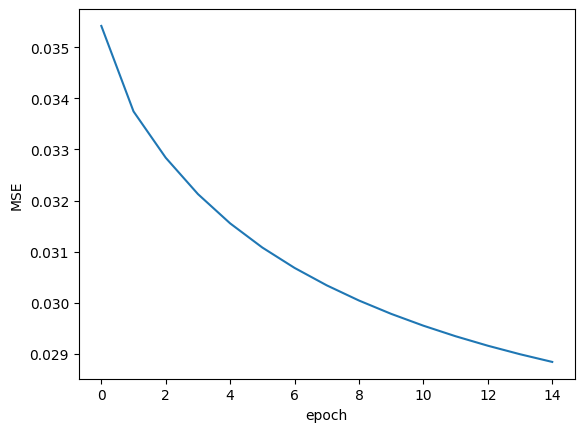

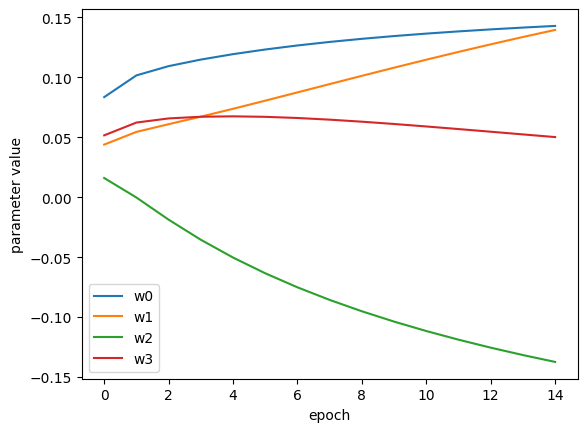

In [19]:
model = Regression(0.001, 0, 15)
model.fit(X, y, plot=True)

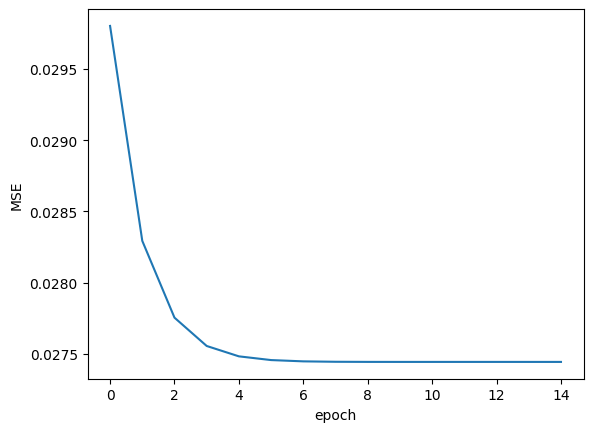

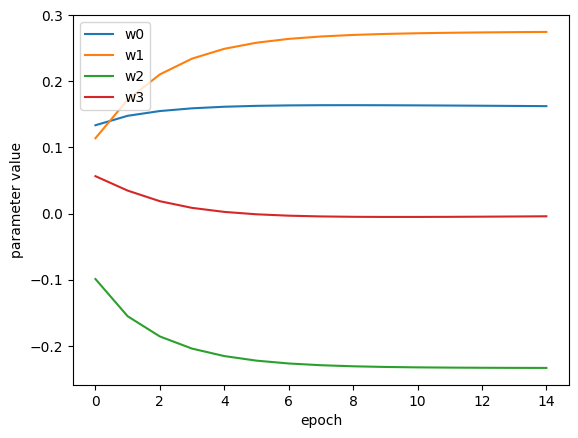

In [20]:
model = Regression(0.01, 0, 15)
model.fit(X, y, plot=True)

# <font color='blue'> Question 2: Regularized regression (25 pts)</font>
In this question, we will explore the applications of ridge (i.e., $l_2$-norm) and lasso ($l_1$-norm) regularized regression using sklearn package in Python. To this end, we will use the dataset Fish.csv (posted to Canvas). The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market and includes 7 columns with 6 features (variables) of the fish and 1 target (label):

x1: Species: Species name of fish (nonnumeric)\
x2: Length1: Vertical length in cm\
x3: Length2: Diagonal length in cm\
x4: Length3: Cross length in cm\
x5: Height: Height in cm\
x6: Width: Diagonal width in cm

y: Weight of the fish in grams

We want to learn the function $y = w_1x_1+w_2x_2+w_3x_3+w_4x_4+w_5x_5+w_6x_6$ to predict the weight of a fish from the features.

* Use the below code to load the dataset. Create a train_test split of 75:25 with random state = 50

* Scale the data so that each of the independent variables has zero mean and unit variance. You can use  [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("Fish.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(axis=1)]

X = df.drop(['Weight'], axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
scaled_X_train = scale(X_train)
scaled_y_train = scale(y_train)

a) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to run [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can create this range of values as follows:

      import numpy as np
      alphas =  10**np.linspace(10,-2,100)*0.5

Report the best $\lambda$ based on cross validation. The cross validation should happen on your training data using average MSE as the scoring metric. (5pts)

b) Run ridge and lasso regression for all alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one figure each for lasso and ridge, so a total of two figures; the results for different features should be plotted in the same figure. What do you qualitatively observe as the value of the regularization parameter is changed? (5pts)

c) Run the (unconstrained) linear regression and its regularized variants (both ridge and lasso) on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) and the mean-squared error (MSE) on the test data for each method. (3pts)

d) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross-validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross-validation. Run lasso on the training data using the best $\lambda$ and report the coefficients for all variables. (3pts)

e) Why did we have to scale the data before regularization? (3pts)

f) Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields sparser models (i.e., fewer parameters) when the tuning parameter $\lambda$ is large (but not infinite)? (3pts)

g) [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) is a type of a regression model that uses combined $l_1$ and $l_2$ priors as regularizers. Run ElasticNet with the same values of alphas on the training data, and find the best value for alpha based on the MSE. Report the MSE on test data and plot a graph showing the predicted and actual values/labels. Comment/compare the results of the three regression models. (3pts)

## Answers

### a. (5 pts)

In [38]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold

lasso = Lasso(random_state=0, max_iter=10000)
ridge = Ridge(random_state=0, max_iter=10000)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{"alpha": alphas}]
k_folds = 5
#k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_cv = GridSearchCV(lasso, tuned_parameters, cv=k_folds, scoring='neg_mean_squared_error', refit=False)
lasso_cv.fit(scaled_X_train, scaled_y_train)
print("Lasso best alpha: [{}, Score: {}]".format(lasso_cv.best_params_, -lasso_cv.best_score_))

ridge_cv = GridSearchCV(ridge, tuned_parameters, cv=k_folds, scoring='neg_mean_squared_error', refit=False)
ridge_cv.fit(scaled_X_train, scaled_y_train)
print("Ridge best alpha: [{}, Score: {}]".format(ridge_cv.best_params_, -ridge_cv.best_score_))



Lasso best alpha: [{'alpha': 0.005}, Score: 0.15315232393797656]
Ridge best alpha: [{'alpha': 16.372745814388658}, Score: 0.14862058919330468]


### b. (5 pts)

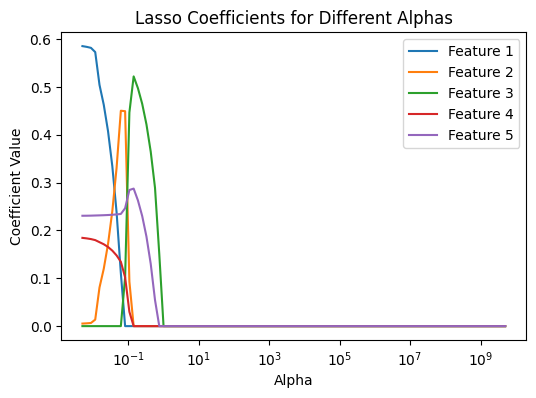

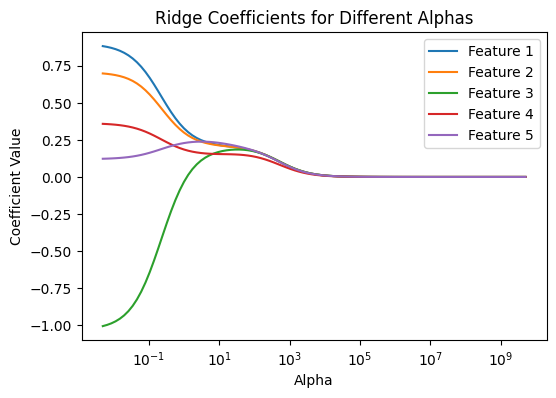

In [43]:
lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(scaled_X_train, scaled_y_train)
    lasso_coefs.append(lasso.coef_)

    ridge = Ridge(alpha=alpha)
    ridge.fit(scaled_X_train, scaled_y_train)
    ridge_coefs.append(ridge.coef_)

lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

plt.figure(figsize=(6, 4))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title('Lasso Coefficients for Different Alphas')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend([f'Feature {i}' for i in range(1, lasso_coefs.shape[1] + 1)])
plt.show()

# Plotting Ridge coefficients
plt.figure(figsize=(6, 4))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title('Ridge Coefficients for Different Alphas')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend([f'Feature {i}' for i in range(1, ridge_coefs.shape[1] + 1)])
plt.show()

# Observation:
As alpha increases, the coefficients tend towards zero

### c. (3 pts)

### d. (3 pts)

### e. (3 pts)

### f. (3 pts)

### g. (3 pts)

# <font color='blue'> Question 3: Feature Selection (20 pts)</font>

In this question, we will explore the importance of feature selection. You may use the code below to load the dataset "zoo.csv" which contains a set of features for different animals and the output variable ("class_type"). 

1. Show the correlation matrix for this dataset; its dimension should be n_features x n_features. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List top-5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000). List the top 5 features selected by RFE. (**2pts**)

To proceed, create a train_test split of 80:20 (training:test) with random state = 50. As part of the preprocessing, we should use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Instead of fitting a model to the original data, we use StandardScaler to first center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Remember that when dealing with training and testing data, we fit preprocessing parameters using training data and apply them to testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a [Linear Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using training data and report the ${R^2}$ score on the test set for each of the following:

   a) Model trained with top-5 most positvely correlated features from part 1. (**2pts**)
   
   b) Model trained with top-5 most negatively correlated features from part 2. (**2pts**)
   
   c) Model trained with five features selected by RFE in part 3. (**2pts**)
   
   d) Finally, train a linear regressor on the entire training data using all the original features. (**2pts**)


5. Comment on your results.  (**4pts**) 

In [1]:
import pandas as pd
from sklearn.model_selection import (train_test_split,KFold)

df = pd.read_csv("zoo.csv")
df = df.drop(['animal_name'], axis = 1)
meta_val = (df['class_type'] <= 4) + 0
df['class_type']=meta_val

y = df['class_type'].values
X = df.drop(['class_type'], axis = 1)

from sklearn import preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state=50)


df_corr = pd.DataFrame(X_train)
df_corr['class_type'] = Y_train

In [2]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


##### ANSWER 